# Neural Network (Google Colab version)
With this Jupyter notebook we can execute several operation to create, load or test a funtional Neural Network.

This Notebook has been prepared to be used in Google Colab and, due to this, it is necessary to use a Google Drive account.

It is also necessary to upload training and validation data in your Google Drive (more or less 100 MB). The upload time can be high (a couple of hours), but in google colab you can use a powerful GPU that some people (like me) can not afford, thus decreasing the training time of the neural network.

## Google Drive access
To use this notebook in google colab, you need to use your Google Drive account. You have to give Google rights to see, read and write on your Drive. Run this cell and you can work with your Google Drive data.

Remember to put in "commonURL" the path to the directory where all the data is upload. I recommend this structure:

Main

| - data

    | - train
    | - validation

| - Neural_Network.h5

| - This_Notebook.ipynb

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
!ls "/content/drive/My Drive/TFM/data"

"""
    Remember to change this Path
"""
commonURL = "/content/drive/My Drive/TFM/"

train  validation


## The Neural Network Architecture

This first cell has important information for the neural network architecture as the dimensions of the images, the number of classes or the path to the training and validation images.

**Run this cell always**, it has information for all the notebook like the numpy import.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import cv2

# Data pre-processing, dimensions of our images.
#img_width, img_height = 240, 135
img_width, img_height = 128, 72
#img_width, img_height = 96, 54

train_data_dir = commonURL + 'data/train'
validation_data_dir = commonURL + 'data/validation'


In this next cell you can see the architecture used in the Neural Network.

You don't need to run this cell, only if you want to train the model.

In [82]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras import backend as K
from keras.applications import vgg16
from keras.optimizers import Adam
from keras.layers import Input

input_tensor = Input(shape=(img_width,img_height,3))

model = Sequential()
model.add(Conv2D(128, (10,10), padding='same', kernel_regularizer=regularizers.l2(0.0001), input_shape = (img_width, img_height,3)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Conv2D(64, (20,20), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (10,5), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Conv2D(64, (5,10), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 72, 128)      38528     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 72, 128)      512       
_________________________________________________________________
activation_5 (Activation)    (None, 128, 72, 128)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 72, 64)       3276864   
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 72, 64)       256       
_________________________________________________________________
activation_6 (Activation)    (None, 128, 72, 64)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 36, 64)        0         
__________

## Training

In this section we can train a new neural network or continue training an existing one.

In [0]:
nb_train_samples = 45000
nb_validation_samples = 4500
batch_size = 64
epochs = 5


In this cell we will upload the "data / train" data. There are many images, so ImageDataGenerator will be useful for that and will not break the computer's RAM. It is advisable to have checked the upper cells and made sure that the path where this folder is located is the correct one.

In [83]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator( rotation_range = 180)

# this is the augmentation configuration we will use for testing
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 40263 images belonging to 7 classes.
Found 2470 images belonging to 7 classes.


In this cell we will train our model. If we use model = load_model(commonURL + 'our_Neural_Network.h5') we can continue training a saved neural network.

In [0]:
# Training
import time
start = time.time()
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)
end = time.time()

model.save(commonURL + 'neural_network_checkpoint.h5')

Epoch 1/5
703/703 [==============================] - 2806s 4s/step - loss: 1.0744 - acc: 0.7449 - val_loss: 3.9615 - val_acc: 0.4567
Epoch 2/5
703/703 [==============================] - 2804s 4s/step - loss: 0.8019 - acc: 0.8142 - val_loss: 1.8442 - val_acc: 0.6339
Epoch 3/5
703/703 [==============================] - 2795s 4s/step - loss: 0.6830 - acc: 0.8492 - val_loss: 2.4039 - val_acc: 0.6125
Epoch 4/5
703/703 [==============================] - 2793s 4s/step - loss: 0.6633 - acc: 0.8665 - val_loss: 5.2529 - val_acc: 0.4496
Epoch 5/5
703/703 [==============================] - 2794s 4s/step - loss: 0.5999 - acc: 0.8858 - val_loss: 1.3870 - val_acc: 0.8062


Loss:  1.360093429060993 Accuracy:  0.8065449688069436


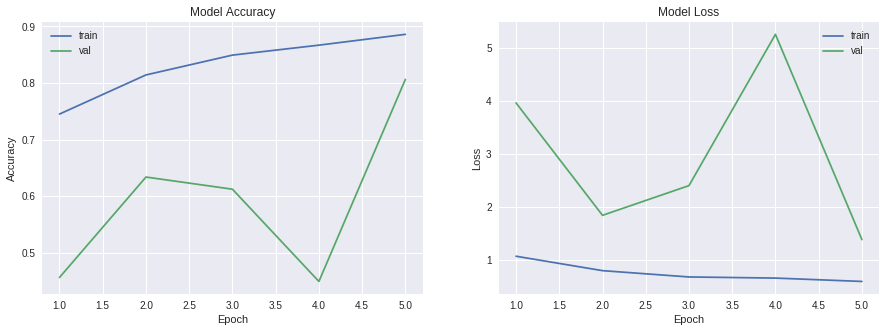

Training MLP took 13991.91858792305 seconds


In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
score = model.evaluate_generator(validation_generator, nb_validation_samples/batch_size, workers=1)

print("Loss: ", score[0], "Accuracy: ", score[1])

plot_model_history(history)

print("Training MLP took " + str(end - start) + " seconds")

model.save(commonURL + 'neural_network.h5')

## Tests

In this section we can analyze the correct execution of our neural network.

With the cell below it is possible to delete the model stored in the memory of the notebook (if necessary) and in the next one you can load a saved neural network to test it.

In this static tests we can check the accuracy and create a confusion matrix to analyze the classification of each image in its respective node.

In [0]:
del model

In [6]:
from keras.models import load_model
model = load_model(commonURL + 'neural_network.h5')

Instructions for updating:
Use tf.cast instead.


In [29]:
def lookForBest(prediction):
  best = 0
  categories = 6
  for i,probability in enumerate(prediction[0]):
    if probability > prediction[0][best]:
      best = i
  return best

def predictImg(img,realLabel,model):
  prediction = model.predict(img)
  print("\tReal label: \tNode" + str(realLabel) + " - " + str(prediction[0][realLabel]*100) + "%")
  best = lookForBest(prediction);
  print("\tPrediction: \tNode" + str(best) + " - " + str(prediction[0][best]*100) + "%")
  return best

import glob
import os,shutil
#from keras.preprocessing import image

totalImages = 0
confusionMatrix = [
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0] 
    ]

for directory in glob.glob("/content/drive/My Drive/TFM/data/validation/*"):
  label = int(directory.split("Nodo")[1]) - 1
  for imgUrl in glob.glob(directory + "/*"):
    print("Image: " + str(imgUrl))
    img = cv2.imread(imgUrl)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(img).convert('RGB')
    img = img.rotate(180)
    img.thumbnail((img_width,img_height), Image.ANTIALIAS)
    img = np.rot90(img)
    img = Image.fromarray(img)
    img = np.expand_dims(img, axis=0)
    best = predictImg(img,label,model)
    totalImages = totalImages + 1
    confusionMatrix[label][best] = confusionMatrix[label][best] + 1
    print("Total Images: " + str(totalImages))
    print(confusionMatrix)

Image: /content/drive/My Drive/TFM/data/validation/Nodo2/img10017.jpg
	Real label: 	Node1 - 99.98931884765625%
	Prediction: 	Node1 - 99.98931884765625%
Total Images: 1
[[0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: /content/drive/My Drive/TFM/data/validation/Nodo2/img10054.jpg
	Real label: 	Node1 - 99.96540546417236%
	Prediction: 	Node1 - 99.96540546417236%
Total Images: 2
[[0, 0, 0, 0, 0, 0, 0], [0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: /content/drive/My Drive/TFM/data/validation/Nodo2/img10044.jpg
	Real label: 	Node1 - 99.98509883880615%
	Prediction: 	Node1 - 99.98509883880615%
Total Images: 3
[[0, 0, 0, 0, 0, 0, 0], [0, 3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Image: /co

Total Images: 2470
True positives: 1823
Accuracy: 0.7380566801619434


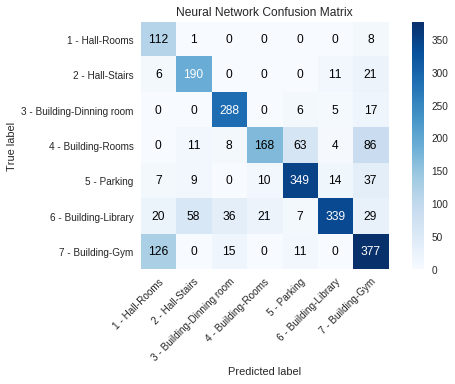

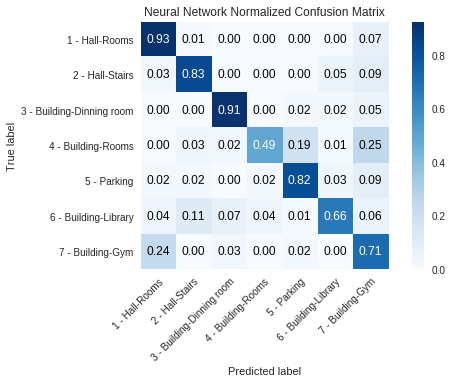

In [81]:
"""
This function has been implemented as the sklearn guide 'Confusion Matrix' says
and has fragments of its code. You can see the base function in this URL:

https://scikit-learn.org/stable/auto_examples/model_selection/
plot_confusion_matrix.html
#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

"""
def plot_confusion_matrix(classes,
                          confusion_matrix,
                          title=None,
                          normalize=False,
                          cmap=plt.cm.Blues):
  plt.rcParams["axes.grid"] = False
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """
  if not title:
    if normalize:
      title = 'Normalized confusion matrix'
    else:
      title = 'Confusion matrix, without normalization'
  # Confusion matrix to np Array
  cm = np.array(confusion_matrix)
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  fig, ax = plt.subplots()
  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(im, ax=ax)
  # We want to show all ticks...
  ax.set(xticks=np.arange(cm.shape[1]),
         yticks=np.arange(cm.shape[0]),
         # ... and label them with the respective list entries
         xticklabels=classes, yticklabels=classes,
         title=title,
         ylabel='True label',
         xlabel='Predicted label')
  
  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
           rotation_mode="anchor")

  # Loop over data dimensions and create text annotations.
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      ax.text(j, i, format(cm[i, j], fmt),
              ha="center", va="center",
              color="white" if cm[i, j] > thresh else "black")
  fig.tight_layout()
  return ax

def confusion_matrix_analisis(confusion_matrix):
  totalImages = 0
  tp = 0
  for diag,labelResults in enumerate(confusion_matrix):
    tp = tp + int(labelResults[diag])
    for j in labelResults:
      totalImages = totalImages + int(j)
  print("Total Images: " + str(totalImages))
  print("True positives: " + str(tp))
  print("Accuracy: " + str(tp/totalImages))
  
plot_confusion_matrix(classes=['1 - Hall-Rooms', '2 - Hall-Stairs', '3 - Building-Dinning room', '4 - Building-Rooms', '5 - Parking', '6 - Building-Library','7 - Building-Gym'], 
                      confusion_matrix = confusionMatrix, title='Neural Network Confusion Matrix', normalize=False)

plot_confusion_matrix(classes=['1 - Hall-Rooms', '2 - Hall-Stairs', '3 - Building-Dinning room', '4 - Building-Rooms', '5 - Parking', '6 - Building-Library','7 - Building-Gym'], 
                      confusion_matrix = confusionMatrix, title='Neural Network Normalized Confusion Matrix', normalize=True)

confusion_matrix_analisis(confusion_matrix = confusionMatrix)